In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [29]:
palette = sns.color_palette(['#5494da', '#5dcdf9', '#e8e37c', '#f3b595', '#f09895'])

In [30]:
df = pd.read_csv('../data.csv')

In [31]:
df.head()

,Unnamed: 0,name,r,n,thread,part,time
0,105,fenwick,30,1000,1,density computation,0.000562
1,106,fenwick,30,1000,1,dependent point finding,0.000617
2,107,fenwick,30,1000,1,single linkage clustering,0.000004
3,108,fenwick,30,1000,2,density computation,0.000456
4,109,fenwick,30,1000,2,dependent point finding,0.000485


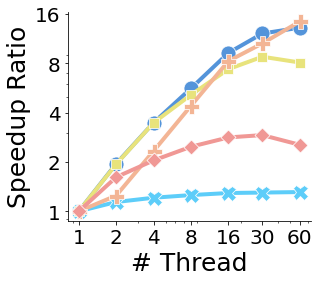

In [116]:
def plot_time_vs_thread(df_):
    df = df_.copy()
    df = df.loc[df['n'] == 10000000]
    threads = sorted(list(set(df['thread'])))
    algos = list(set(df['name']))
    trimmers = []
    for algo in algos:
        t_trimmers = []
        for thread in threads:
            element_df = df.loc[df['name'] == algo].loc[df['thread'] == thread]
            assert len(element_df) == 3
            time = sum(element_df['time'].to_numpy())
            t_trimmers.append({'name':algo, 'n':10000000, 'thread':thread, 'time':time, 'speedup':(1/time)})
        for row in t_trimmers:
            row['speedup'] *= t_trimmers[0]['time']
        trimmers += t_trimmers
    df_trim = pd.DataFrame(trimmers)
    df_trim['name'] = df_trim['name'].map({'priority':'DPC-PRIORITY', 'fenwick':'DPC-FENWICK', 'static':'DPC-INCOMPLETE', 'orig':'DPC-EXACT-BASELINE', 'approx':'DPC-APPROX-BASELINE'})
    
    fontsize = 20
    fig = plt.figure(figsize=(3.5, 4))
    g = sns.lineplot(data=df_trim, x='thread', y='speedup', hue='name', palette=palette, style="name", markers=True, dashes=False, linewidth=4, markersize=15)
    g.set(xscale="log", yscale="log")
    plt.ylabel("Speedup Ratio", fontsize = fontsize+5)
    plt.xlabel("# Thread", fontsize = fontsize+5)
    g.set_xticks([1, 2, 4, 8, 16, 30, 60])
    g.set_xticklabels([1, 2, 4, 8, 16, 30, 60])
    g.set_yticks([1, 2, 4, 8, 16])
    g.set_yticklabels([1, 2, 4, 8, 16])
    sns.despine()
    
    for l in g.yaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    for l in g.xaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    
    handles, labels = g.get_legend_handles_labels()
    g.legend(handles, labels, loc=10, ncol=1,bbox_to_anchor=(-0.9, 0.5),frameon=False, fontsize = fontsize)
    plt.legend([],[], frameon=False)
    plt.subplots_adjust(left=0.03,right=0.995, top=0.85,wspace=0.1, hspace = 0.25)

    plt.savefig('../images/time_vs_thread.pdf', bbox_inches='tight' )
plot_time_vs_thread(df)

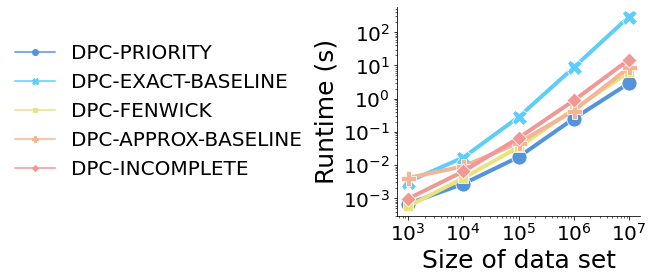

In [115]:
def plot_time_vs_n(df_):
    df = df_.copy()
    df = df.loc[df['thread'] == 60]
    ns = sorted(list(set(df['n'])))
    algos = list(set(df['name']))
    trimmers = []
    for algo in algos:
        t_trimmers = []
        for n in ns:
            element_df = df.loc[df['name'] == algo].loc[df['n'] == n]
            assert len(element_df) == 3
            time = sum(element_df['time'].to_numpy())
            t_trimmers.append({'name':algo, 'n':n, 'thread':60, 'time':time, 'speedup':(1/time)})
        for row in t_trimmers:
            row['speedup'] *= t_trimmers[0]['time']
        trimmers += t_trimmers
    df_trim = pd.DataFrame(trimmers)
    df_trim['name'] = df_trim['name'].map({'priority':'DPC-PRIORITY', 'fenwick':'DPC-FENWICK', 'static':'DPC-INCOMPLETE', 'orig':'DPC-EXACT-BASELINE', 'approx':'DPC-APPROX-BASELINE'})
    
    fontsize = 20
    fig = plt.figure(figsize=(3.5, 4))
    g = sns.lineplot(data=df_trim, x='n', y='time', hue='name', palette=palette, style="name", markers=True, dashes=False, linewidth=4, markersize=15)
    g.set(xscale="log", yscale="log")
    plt.ylabel("Runtime (s)", fontsize = fontsize+5)
    plt.xlabel("Size of data set", fontsize = fontsize+5)
    #g.set_xticks([1, 2, 4, 8, 16, 30, 60])
    #g.set_xticklabels([1, 2, 4, 8, 16, 30, 60])
    #g.set_yticks([1, 2, 4, 8, 16])
    #g.set_yticklabels([1, 2, 4, 8, 16])
    sns.despine()
    
    for l in g.yaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    for l in g.xaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    
    handles, labels = g.get_legend_handles_labels()
    g.legend(handles, labels, loc=10, ncol=1,bbox_to_anchor=(-0.98, 0.5),frameon=False, fontsize = fontsize)
    #plt.legend([],[], frameon=False)
    plt.subplots_adjust(left=0.03,right=0.995, top=0.85,wspace=0.1, hspace = 0.25)

    plt.savefig('../images/time_vs_n.pdf', bbox_inches='tight' )
plot_time_vs_n(df)